# Observations and Insights

In [43]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [44]:
# Checking the number of mice.
mice_number = combine_data["Mouse ID"].count()
mice_number

1893

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combine_data[combine_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = combine_data[combine_data.duplicated(["Mouse ID"])]
all_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_df = combine_data.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [48]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = clean_df["Mouse ID"].count()
clean_mice_number

249

# Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dv = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance,
                          "Standard Deviation": std_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

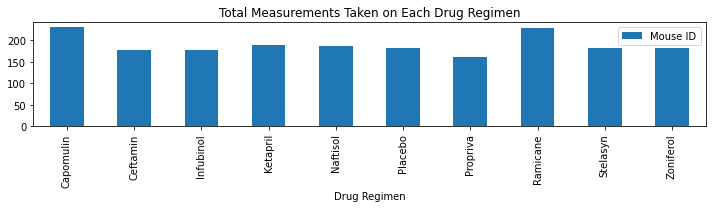

In [50]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measurements = pd.DataFrame(combine_data.groupby(["Drug Regimen"]).count()).reset_index()
drug_measurements_df = drug_measurements[["Drug Regimen", "Mouse ID"]]
drug_measurements_df = drug_measurements_df.set_index("Drug Regimen")

drug_measurements_df.plot(kind="bar", figsize=(10,3))
plt.title("Total Measurements Taken on Each Drug Regimen")
plt.tight_layout()
plt.show()

In [149]:
regimen_data = combine_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

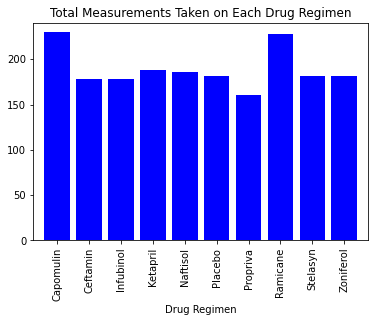

In [156]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
point = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(regimen_data))
plt.bar(x_axis, point, color="blue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                           "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.xlim(-0.75, len(point)-0.25)
plt.ylim(0, max(point)+10)
plt.title("Total Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")

plt.show()

In [167]:
gender_gb = combine_data.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())
total_gender_df = pd.DataFrame(gender_df.groupby(["Sex"]).count())
total_gender_df.columns = ["Total Count"]

total_gender_df["Percentage of Sex"] = (100*(total_gender_df["Total Count"]/total_gender_df["Total Count"].sum()))
total_gender_df["Percentage of Sex"] = total_gender_df["Percentage of Sex"]

total_gender_df

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


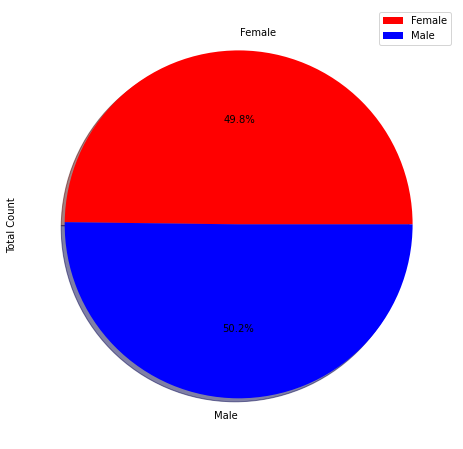

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['red', 'blue']
plot = mouse_gender.plot.pie(y='Total Count',figsize=(8,8), colors = colors, 
                             shadow = True, autopct="%1.1f%%")

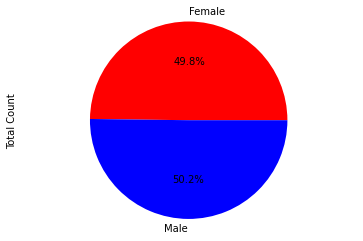

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
percentage = [49.799197, 50.200803]
colors = ["red", "blue"]

plt.pie(percentage, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel("Total Count")
plt.axis("equal")

plt.show()

# Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = combine_data.loc[combine_data["Drug Regimen"] == "Capomulin",:]
ramicane = combine_data.loc[combine_data["Drug Regimen"] == "Ramicane",:]
infubinol = combine_data.loc[combine_data["Drug Regimen"] == "Infubinol",:]
ceftamin = combine_data.loc[combine_data["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin.groupby("Mouse ID").max()["Timepoint"]
ramicane_last = ramicane.groupby("Mouse ID").max()["Timepoint"]
infubinol_last = infubinol.groupby("Mouse ID").max()["Timepoint"]
ceftamin_last = ceftamin.groupby("Mouse ID").max()["Timepoint"]

# Group dataframe for each
capomulin_df = pd.DataFrame(capomulin_last)
ramicane_df = pd.DataFrame(ramicane_last)
infubinol_df = pd.DataFrame(infubinol_last)
ceftamin_df = pd.DataFrame(ceftamin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_df, combine_data, on=("Mouse ID", "Timepoint"), how="left")
# capomulin_merge.head()
ramicane_merge = pd.merge(ramicane_df, combine_data, on=("Mouse ID", "Timepoint"), how="left")
# ramicane_merge.head()
infubinol_merge = pd.merge(infubinol_df, combine_data, on=("Mouse ID", "Timepoint"), how="left")
# infubinol_merge.head()
ceftamin_merge = pd.merge(ceftamin_df, combine_data, on=("Mouse ID", "Timepoint"), how="left")
# ceftamin_merge.head()

In [55]:
# Capomulin quartiles, outliers, and IQR
capomulin_tumors_volume = capomulin_merge["Tumor Volume (mm3)"]

quartiles = capomulin_tumors_volume.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q-lower_q

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

In [56]:
# Ramicane quartiles, outliers, and IQR
ramicane_tumors_volume = ramicane_merge["Tumor Volume (mm3)"]

quartiles = ramicane_tumors_volume.quantile([.25, .5, .75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q-lower_q

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

In [57]:
# Infubinol quartiles, outliers, and IQR
infubinol_tumors_volume = infubinol_merge["Tumor Volume (mm3)"]

quartiles = infubinol_tumors_volume.quantile([.25, .5, .75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q-lower_q

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

In [58]:
# Ceftamin quartiles, outliers, and IQR
ceftamin_tumors_volume = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors_volume.quantile([.25, .5, .75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q-lower_q

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

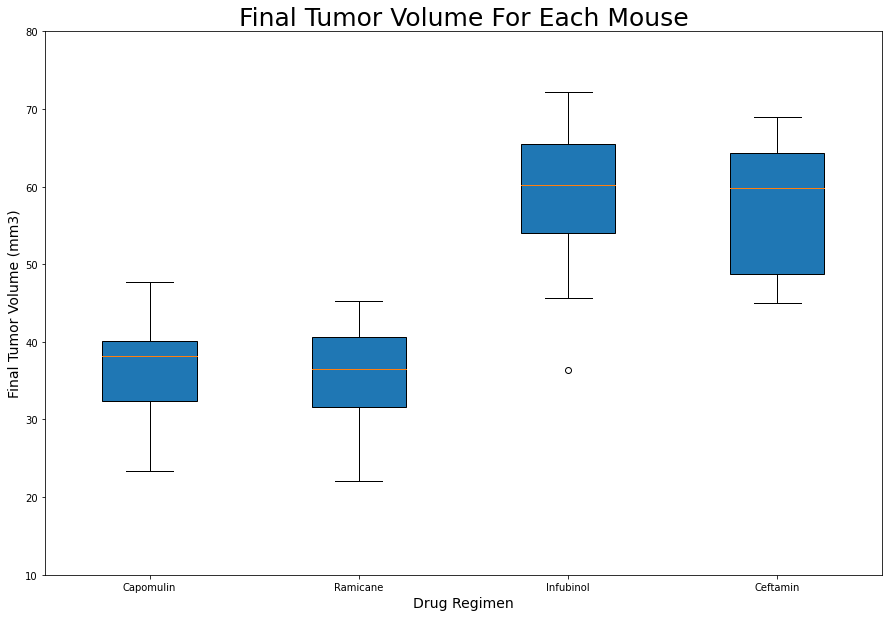

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
quartiles_plot = [capomulin_tumors_volume, ramicane_tumors_volume, infubinol_tumors_volume, ceftamin_tumors_volume]
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title("Final Tumor Volume For Each Mouse", fontsize=25)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize=14)
ax1.set_xlabel("Drug Regimen", fontsize=14)
ax1.boxplot(quartiles_plot, labels=regimen, patch_artist=True)

plt.ylim(10, 80)
plt.show()

# Line and Scatter Plots

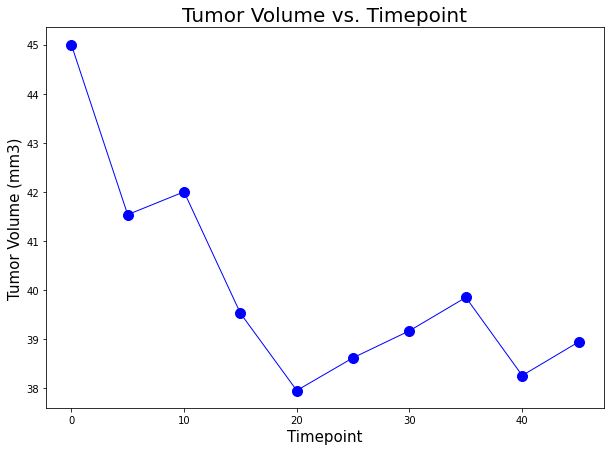

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = capomulin.loc[capomulin["Mouse ID"] == "b742"]
# line_plot.head()

x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots(figsize=(10, 7))
plt.title('Tumor Volume vs. Timepoint',fontsize =20)
plt.plot(x_axis, y_axis,linewidth=1,marker="o",color="blue", markersize=10)
plt.xlabel('Timepoint',fontsize =15)
plt.ylabel('Tumor Volume (mm3)',fontsize =15)

plt.show()

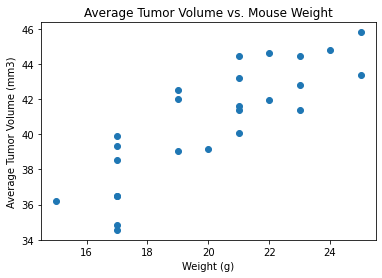

In [135]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_volume_cap = capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(weight_volume_cap["Weight (g)"],weight_volume_cap["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight")

plt.show()

# Correlation and Regression

Correlation Coefficient: 0.84 


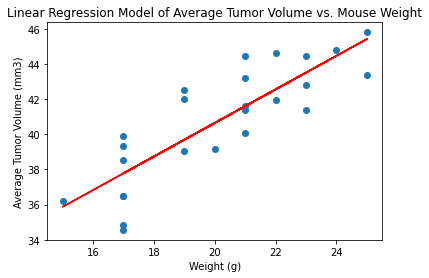

In [147]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(weight_volume_cap['Weight (g)'],weight_volume_cap['Tumor Volume (mm3)'])[0],2)
print(f"Correlation Coefficient: {correlation} ")

line_model = st.linregress(weight_volume_cap["Weight (g)"],weight_volume_cap["Tumor Volume (mm3)"])
line_model

slope = 0.9544396890241045
intercept = 21.552160532685015
y_values = weight_volume_cap["Weight (g)"]*slope+intercept
plt.scatter(weight_volume_cap["Weight (g)"],weight_volume_cap["Tumor Volume (mm3)"])
plt.plot(weight_volume_cap["Weight (g)"],y_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Regression Model of Average Tumor Volume vs. Mouse Weight")

plt.show()